In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',999)

In [42]:
data= pd.read_csv('data/listings.csv')


In [3]:
data.nunique()

id                              45533
name                            44004
host_id                         23202
host_name                        8631
host_since                      11929
host_response_time                  4
host_response_rate                 67
host_is_superhost                   2
neighbourhood_cleansed            266
neighbourhood_group_cleansed        3
latitude                        34373
longitude                       36850
property_type                     103
room_type                           4
accommodates                       16
bathrooms                          32
bedrooms                           21
beds                               30
price                            1566
minimum_nights                    104
availability_365                  366
number_of_reviews                 646
review_scores_rating              157
license                          7582
instant_bookable                    2
dtype: int64

In [4]:
data.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   name                          45532 non-null  object
 1   host_name                     45531 non-null  object
 2   host_since                    45531 non-null  object
 3   host_response_time            35445 non-null  object
 4   host_is_superhost             44281 non-null  object
 5   neighbourhood_cleansed        45533 non-null  object
 6   neighbourhood_group_cleansed  45533 non-null  object
 7   property_type                 45533 non-null  object
 8   room_type                     45533 non-null  object
 9   license                       12803 non-null  object
 10  instant_bookable              45533 non-null  object
dtypes: object(11)
memory usage: 3.8+ MB


In [5]:
data.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45533 non-null  int64  
 1   host_id               45533 non-null  int64  
 2   host_response_rate    35445 non-null  float64
 3   latitude              45533 non-null  float64
 4   longitude             45533 non-null  float64
 5   accommodates          45533 non-null  int64  
 6   bathrooms             37294 non-null  float64
 7   bedrooms              42494 non-null  float64
 8   beds                  37199 non-null  float64
 9   price                 37296 non-null  float64
 10  minimum_nights        45533 non-null  int64  
 11  availability_365      45533 non-null  int64  
 12  number_of_reviews     45533 non-null  int64  
 13  review_scores_rating  33387 non-null  float64
dtypes: float64(8), int64(6)
memory usage: 4.9 MB


In [6]:
data['bathrooms'].unique()

array([ 3. ,  nan,  1. ,  0. ,  3.5,  4.5,  1.5,  2. ,  4. ,  6. ,  2.5,
        5. ,  8. ,  5.5,  0.5, 10. , 11. ,  7. ,  6.5, 11.5, 13. ,  9.5,
        8.5,  7.5, 12. ,  9. , 10.5, 13.5, 21. , 16. , 24. , 50. , 12.5])

In [7]:
data['bedrooms'].unique()

array([ 3.,  2.,  1.,  0.,  4., nan,  5.,  6.,  7., 16.,  8.,  9., 10.,
       12., 13., 24., 23., 11., 19., 50., 18., 14.])

In [8]:
data['beds'].unique()

array([ 3., nan,  1.,  5.,  4.,  2.,  6.,  8.,  0.,  9.,  7., 13., 10.,
       20., 12., 11., 15., 32., 16., 24., 28., 30., 14., 25., 22., 50.,
       17., 19., 18., 26., 21.])

In [9]:
data[['bathrooms','bedrooms','beds','price']].head(20)

,bathrooms,bedrooms,beds,price
0,3.0,3.0,3.0,399.0
1,NaN,2.0,NaN,NaN
2,3.0,3.0,3.0,434.0
3,1.0,1.0,1.0,49.0
4,1.0,0.0,1.0,231.0
5,0.0,4.0,1.0,62.0
6,1.0,2.0,5.0,110.0
7,3.5,4.0,4.0,1179.0
8,4.5,4.0,4.0,1244.0
9,1.0,1.0,1.0,250.0


In [10]:
data[['bathrooms','bedrooms','beds','review_scores_rating']]=data[['bathrooms','bedrooms','beds','review_scores_rating']].fillna(0)

In [11]:
data= data.dropna(subset=['price'])


In [12]:
def change_t_to_True(x):
    if x=='f':
        return 0
    return 1

data['host_is_superhost']=data['host_is_superhost'].apply(change_t_to_True)
data['instant_bookable']=data['instant_bookable'].apply(change_t_to_True)

data= data.drop(columns=['license','name', 'host_name', 'host_response_time','property_type','host_since','id','host_id'])


In [13]:
from sklearn.impute import SimpleImputer

rate_imputer = SimpleImputer(strategy='mean')
data['host_response_rate'] = rate_imputer.fit_transform(data[['host_response_rate']]).ravel()


In [14]:
data.isna().sum()

host_response_rate              0
host_is_superhost               0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
price                           0
minimum_nights                  0
availability_365                0
number_of_reviews               0
review_scores_rating            0
instant_bookable                0
dtype: int64

In [15]:
data.select_dtypes('O').head(10)

,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type
0,West Los Angeles,City of Los Angeles,Entire home/apt
2,Beverly Hills,Other Cities,Entire home/apt
3,Temple City,Other Cities,Private room
4,Santa Monica,Other Cities,Entire home/apt
5,North Hollywood,City of Los Angeles,Private room
6,Del Rey,City of Los Angeles,Entire home/apt
7,Venice,City of Los Angeles,Entire home/apt
8,Beverly Grove,City of Los Angeles,Entire home/apt
9,Westlake,City of Los Angeles,Entire home/apt
10,Downtown,City of Los Angeles,Private room


In [16]:
data.select_dtypes('O').nunique()

neighbourhood_cleansed          265
neighbourhood_group_cleansed      3
room_type                         4
dtype: int64

In [17]:
data.select_dtypes('number').head()

,host_response_rate,host_is_superhost,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,0.96,0,34.049660,-118.435550,6,3.0,3.0,3.0,399.0,30,365,0,0.00,0
2,0.60,0,34.070583,-118.390742,6,3.0,3.0,3.0,434.0,30,267,0,0.00,0
3,0.20,0,34.109329,-118.073098,2,1.0,1.0,1.0,49.0,1,364,1,3.00,0
4,1.00,1,34.015590,-118.494080,2,1.0,0.0,1.0,231.0,5,193,44,4.93,1
5,1.00,0,34.173990,-118.361840,1,0.0,4.0,1.0,62.0,30,278,0,0.00,0


In [18]:
data.select_dtypes('number').describe()

,host_response_rate,host_is_superhost,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable
count,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000,37296.000000
mean,0.952964,0.452756,34.056152,-118.313287,4.174174,1.649051,1.772013,2.249544,289.377762,16.142428,231.080143,40.965975,3.607980,0.280057
std,0.157146,0.497770,0.145493,0.173855,2.922884,1.218681,1.363363,1.812859,715.366985,21.030276,112.658666,85.594459,2.089696,0.449033
min,0.000000,0.000000,33.338360,-118.917134,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.970000,0.000000,33.999355,-118.414812,2.000000,1.000000,1.000000,1.000000,98.000000,2.000000,136.750000,1.000000,2.000000,0.000000
50%,1.000000,0.000000,34.060567,-118.344060,4.000000,1.000000,1.000000,2.000000,155.000000,5.000000,255.000000,7.000000,4.810000,0.000000
75%,1.000000,1.000000,34.110221,-118.228475,6.000000,2.000000,2.000000,3.000000,260.000000,30.000000,344.000000,41.000000,4.980000,1.000000
max,1.000000,1.000000,34.811183,-117.653352,16.000000,50.000000,50.000000,50.000000,56425.000000,700.000000,365.000000,3024.000000,5.000000,1.000000


In [19]:
data['neighbourhood_group_cleansed'].unique()

array(['City of Los Angeles', 'Other Cities', 'Unincorporated Areas'],
      dtype=object)

## Visualization

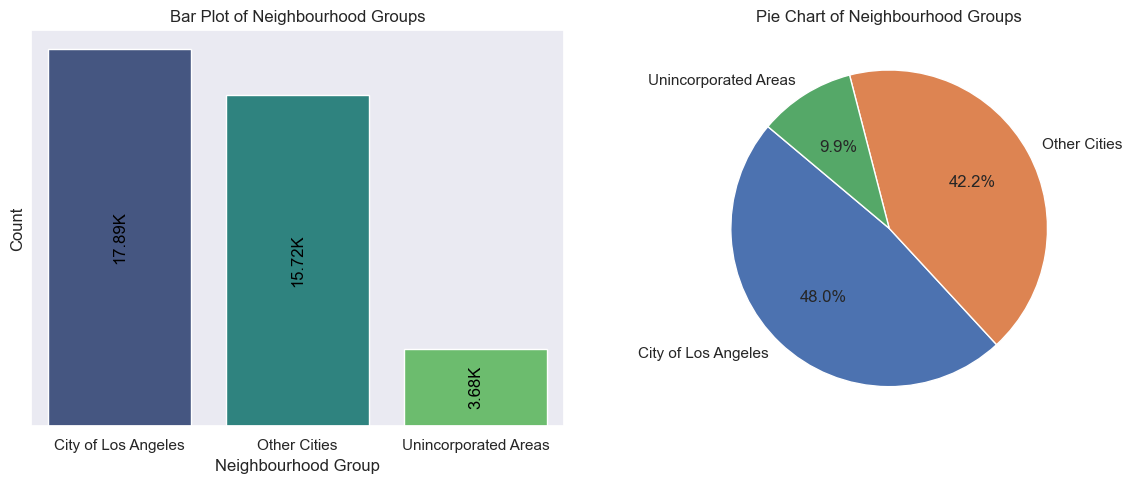

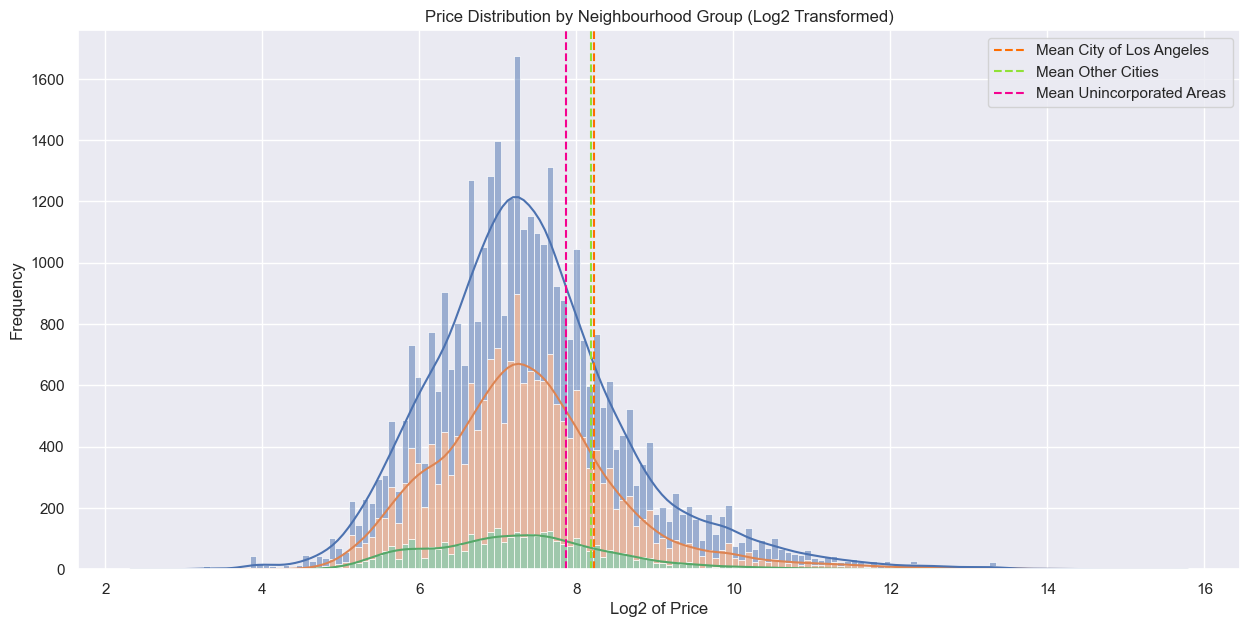

<Figure size 640x480 with 0 Axes>

In [20]:
group_counts = data['neighbourhood_group_cleansed'].value_counts()

sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
ax=sns.barplot(
    x=group_counts.index,
    y=group_counts.values,
    ax=axes[0],
    palette="viridis"
)
for container in ax.containers:
    label=[f'{val:.2f}K' for val in container.datavalues/1000]
    ax.bar_label(container,labels=label,label_type='center',rotation=90,color='black')

axes[0].set_title('Bar Plot of Neighbourhood Groups')
axes[0].set_xlabel('Neighbourhood Group')
axes[0].set_ylabel('Count')
axes[0].set_yticks([])

axes[1].pie(
    group_counts.values,
    labels=group_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
axes[1].set_title('Pie Chart of Neighbourhood Groups')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,7))
ax=sns.histplot(
    x=np.log2(data['price']),
    hue=data['neighbourhood_group_cleansed'],
    multiple='stack',
    kde=True
)


for col in ['City of Los Angeles', 'Other Cities', 'Unincorporated Areas']:
    colors={
    'City of Los Angeles':'#fe6d01',
    'Other Cities':'#90e137',
    'Unincorporated Areas':'#f40290'

        }
    mean_price = np.log2(data['price'][data['neighbourhood_group_cleansed'] == col].mean())
    ax.axvline(mean_price, color=colors[col], linestyle='--', label=f'Mean {col}')

ax.legend()
    
plt.title('Price Distribution by Neighbourhood Group (Log2 Transformed)')
plt.xlabel('Log2 of Price')
plt.ylabel('Frequency')
plt.show()


plt.tight_layout()
plt.show()


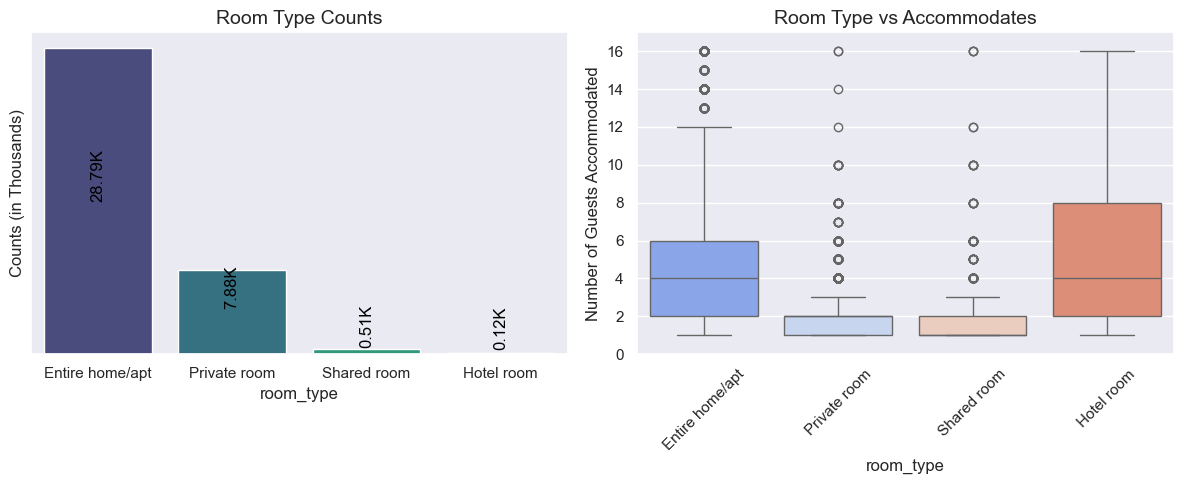

Text(0, 0.5, 'Frequency')

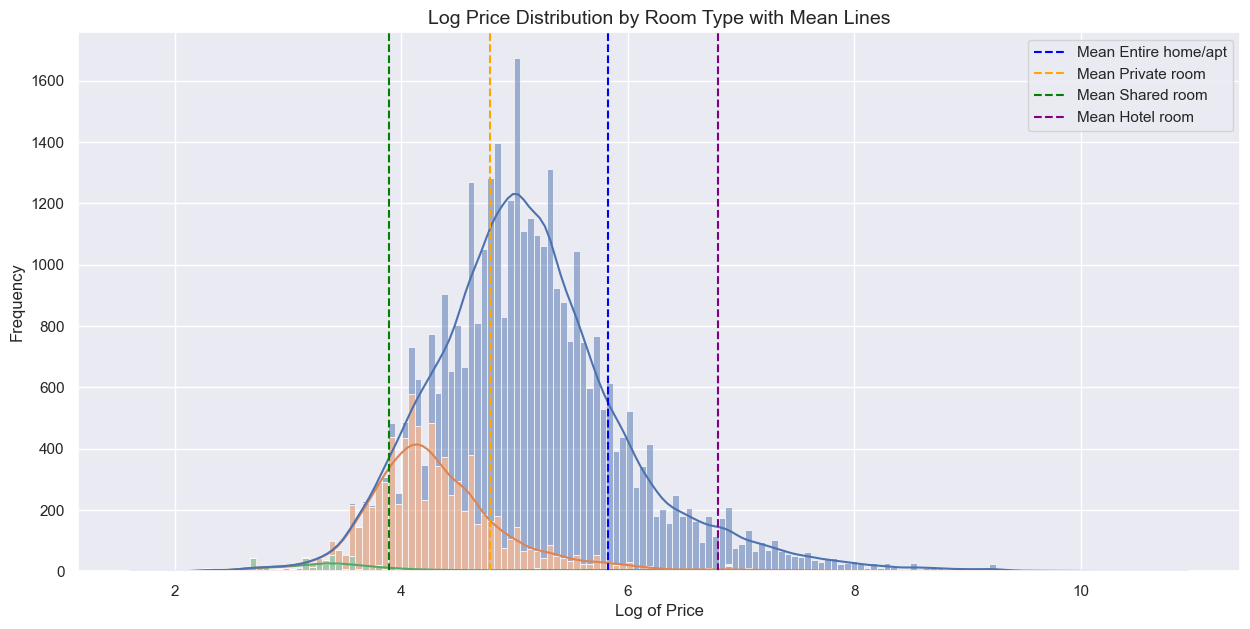

In [21]:
group_counts = data['room_type'].value_counts()

sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
ax=sns.barplot(
    x=group_counts.index,
    y=group_counts.values,
    ax=axes[0],
    palette="viridis"
)
for container in ax.containers:
    label=[f'{val:.2f}K' for val in container.datavalues/1000]
    ax.bar_label(container,labels=label,label_type='center',rotation=90,color='black',padding=18)

axes[0].set_title("Room Type Counts", fontsize=14)
axes[0].set_ylabel("Counts (in Thousands)", fontsize=12)
axes[0].set_yticks([])

sns.boxplot(x=data['room_type'],y=data['accommodates'],ax=axes[1], 
    palette="coolwarm")

axes[1].set_title("Room Type vs Accommodates", fontsize=14)
axes[1].set_ylabel("Number of Guests Accommodated", fontsize=12)
axes[1].set_ylim([0,17])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,7))
ax = sns.histplot(
    x=np.log(data['price']),
    hue=data['room_type'],
    multiple='stack',
    kde=True
)

colors = {
    'Entire home/apt': 'blue',
    'Private room': 'orange',
    'Shared room': 'green',
    'Hotel room': 'purple'
}

for col in data['room_type'].unique():
    mean_price = np.log(data['price'][data['room_type'] == col].mean())  # Calculate log2 mean price
    ax.axvline(mean_price, color=colors[col], linestyle='--', label=f'Mean {col}')  # Add vertical line
ax.legend()

ax.set_title("Log Price Distribution by Room Type with Mean Lines", fontsize=14)
ax.set_xlabel("Log of Price", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)



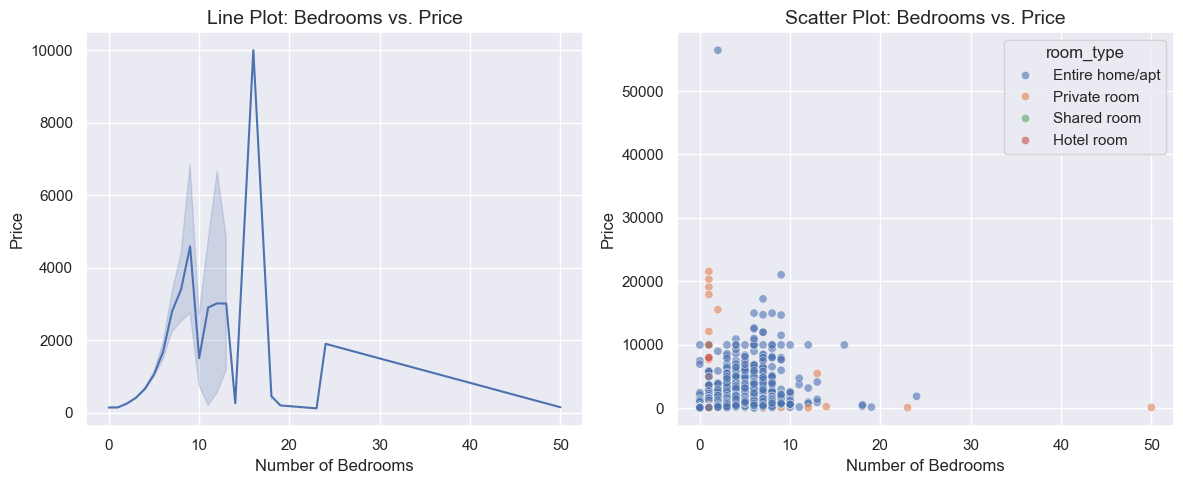

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(
    x=data['bedrooms'], 
    y=data['price'], 
    ax=axes[0]
)
axes[0].set_title("Line Plot: Bedrooms vs. Price", fontsize=14)
axes[0].set_xlabel("Number of Bedrooms", fontsize=12)
axes[0].set_ylabel("Price", fontsize=12)

sns.scatterplot(
    x=data['bedrooms'], 
    y=data['price'], 
    ax=axes[1], 
    alpha=0.6,hue=data['room_type']
)
axes[1].set_title("Scatter Plot: Bedrooms vs. Price", fontsize=14)
axes[1].set_xlabel("Number of Bedrooms", fontsize=12)
axes[1].set_ylabel("Price", fontsize=12)

plt.tight_layout()
plt.show()


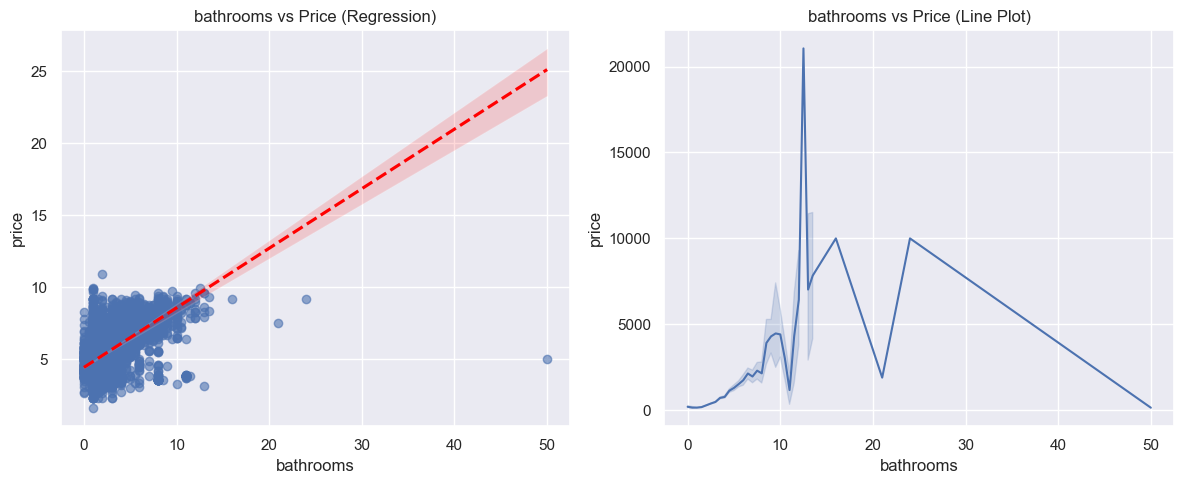

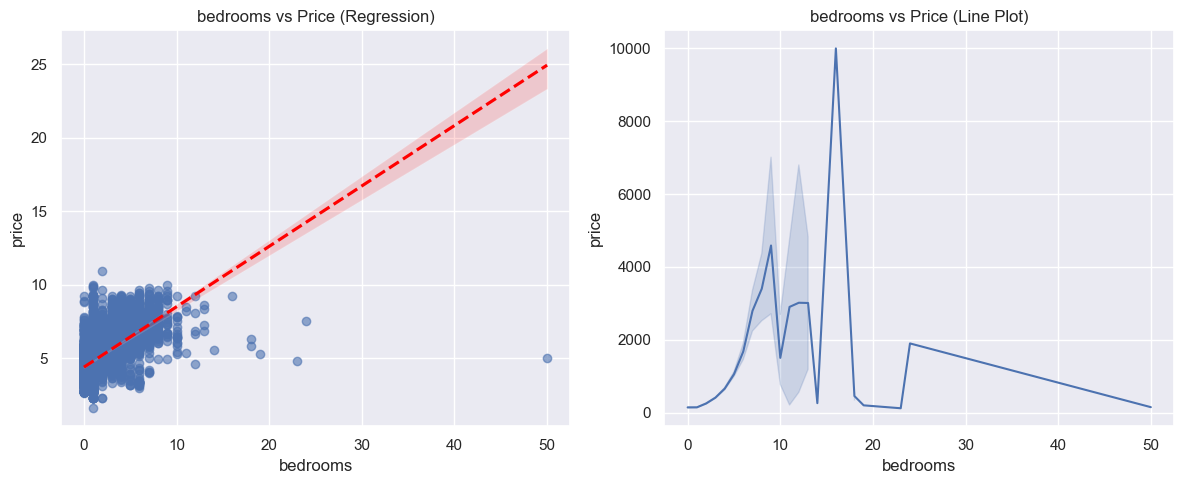

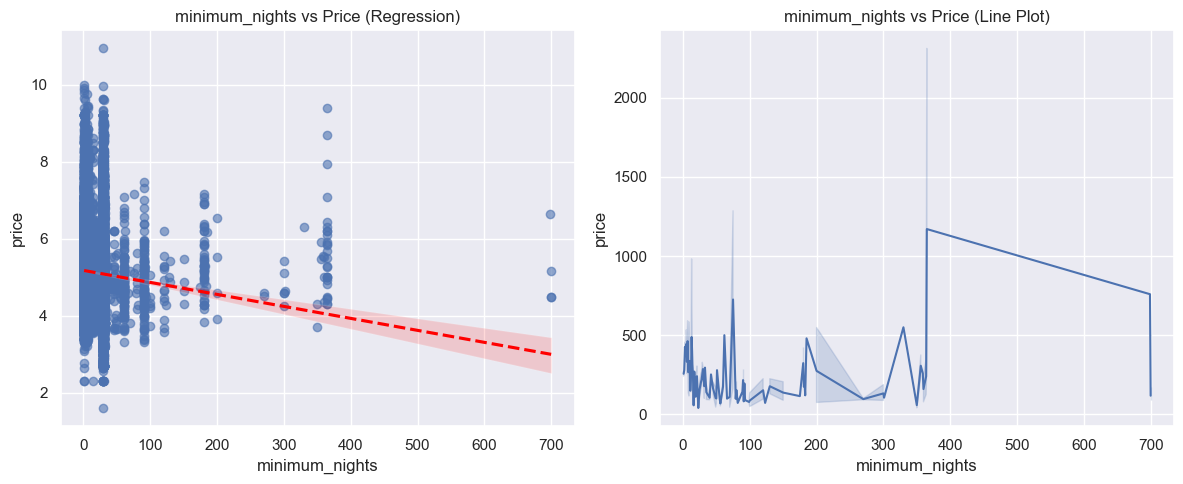

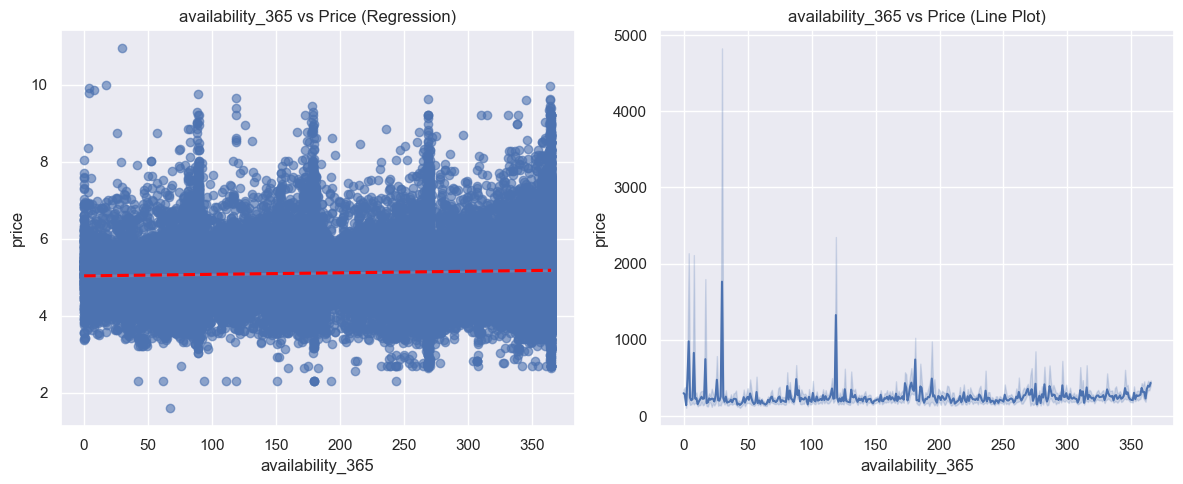

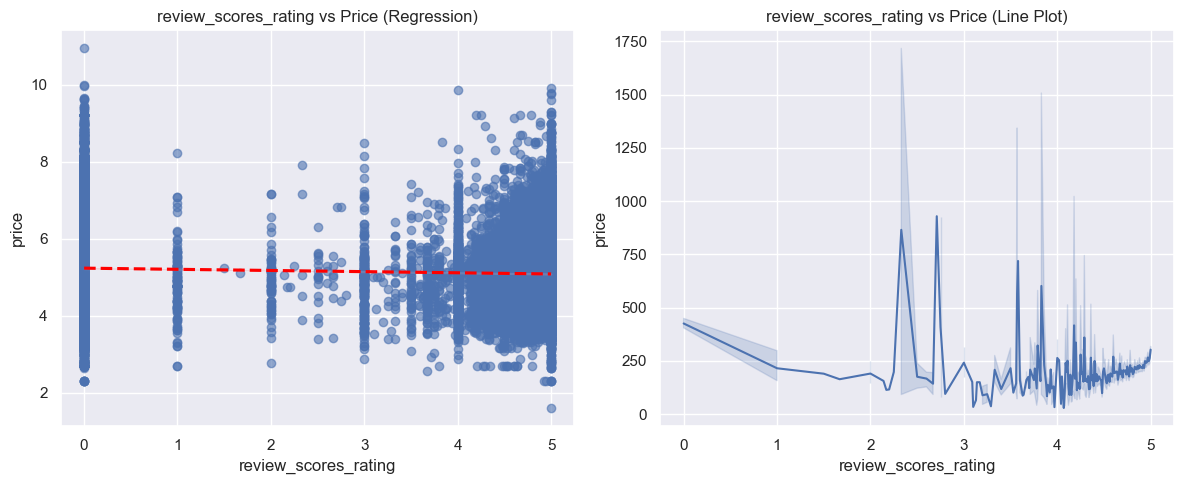

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
columns = ['bathrooms', 'bedrooms', 'price', 'minimum_nights', 'availability_365', 'neighbourhood_group_cleansed','review_scores_rating']
selected_data = data[columns]

features = ['bathrooms', 'bedrooms', 'minimum_nights', 'availability_365','review_scores_rating']

for feature in features:

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.regplot(
        data=selected_data,
        x=feature,
        y=np.log(selected_data['price']),
        ax=axes[0],
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red','linestyle': '--'}, 
        ci=95,
        truncate=True,  
        marker='o' 
    )
    axes[0].set_title(f"{feature} vs Price (Regression)")

    sns.lineplot(
        data=selected_data,
        x=feature,
        y='price',
        ax=axes[1],   
        markers='O'            
    )
    axes[1].set_title(f"{feature} vs Price (Line Plot)")

    plt.tight_layout()
    plt.show()




In [24]:
correlation= data.select_dtypes('number').corr()
correlation

,host_response_rate,host_is_superhost,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable
host_response_rate,1.000000,0.212372,-0.012475,0.030959,0.033827,0.000480,0.011048,0.027704,-0.021697,-0.103868,-0.068373,0.088030,0.165281,0.058525
host_is_superhost,0.212372,1.000000,0.000064,0.017007,0.054770,-0.002978,0.028281,0.051678,-0.029168,-0.161831,-0.124911,0.255466,0.343783,-0.031435
latitude,-0.012475,0.000064,1.000000,-0.059704,0.018828,0.047933,0.041240,0.012373,0.002303,-0.000466,0.008422,-0.047483,-0.037267,-0.066902
longitude,0.030959,0.017007,-0.059704,1.000000,-0.055590,-0.112151,-0.070054,-0.045722,-0.151231,-0.143040,-0.045738,0.017262,0.073617,0.008232
accommodates,0.033827,0.054770,0.018828,-0.055590,1.000000,0.659278,0.817898,0.778011,0.347196,-0.097682,0.044927,-0.055717,-0.007349,0.058996
bathrooms,0.000480,-0.002978,0.047933,-0.112151,0.659278,1.000000,0.763257,0.619823,0.464516,-0.002727,0.061996,-0.104010,-0.088376,-0.026108
bedrooms,0.011048,0.028281,0.041240,-0.070054,0.817898,0.763257,1.000000,0.765606,0.377105,-0.038560,0.046328,-0.101991,-0.046998,-0.000774
beds,0.027704,0.051678,0.012373,-0.045722,0.778011,0.619823,0.765606,1.000000,0.281814,-0.064214,0.047110,-0.034698,0.016443,0.021328
price,-0.021697,-0.029168,0.002303,-0.151231,0.347196,0.464516,0.377105,0.281814,1.000000,-0.004694,0.043038,-0.062288,-0.104000,0.003102
minimum_nights,-0.103868,-0.161831,-0.000466,-0.143040,-0.097682,-0.002727,-0.038560,-0.064214,-0.004694,1.000000,0.119713,-0.166639,-0.177953,-0.123939


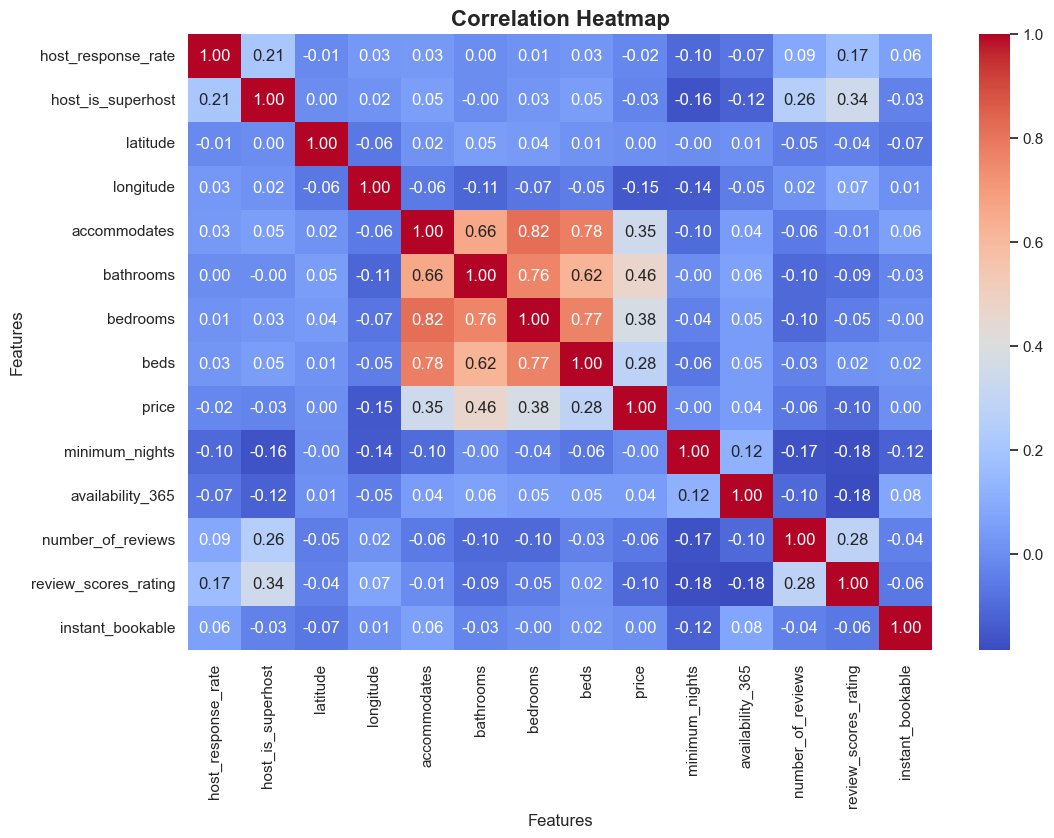

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

plt.show()

In [26]:
data.head(10)

,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,0.960000,0,West Los Angeles,City of Los Angeles,34.049660,-118.435550,Entire home/apt,6,3.0,3.0,3.0,399.0,30,365,0,0.00,0
2,0.600000,0,Beverly Hills,Other Cities,34.070583,-118.390742,Entire home/apt,6,3.0,3.0,3.0,434.0,30,267,0,0.00,0
3,0.200000,0,Temple City,Other Cities,34.109329,-118.073098,Private room,2,1.0,1.0,1.0,49.0,1,364,1,3.00,0
4,1.000000,1,Santa Monica,Other Cities,34.015590,-118.494080,Entire home/apt,2,1.0,0.0,1.0,231.0,5,193,44,4.93,1
5,1.000000,0,North Hollywood,City of Los Angeles,34.173990,-118.361840,Private room,1,0.0,4.0,1.0,62.0,30,278,0,0.00,0
6,1.000000,0,Del Rey,City of Los Angeles,33.990170,-118.422520,Entire home/apt,7,1.0,2.0,5.0,110.0,30,117,368,4.61,0
7,1.000000,1,Venice,City of Los Angeles,33.982577,-118.464266,Entire home/apt,6,3.5,4.0,4.0,1179.0,2,356,35,4.97,0
8,1.000000,1,Beverly Grove,City of Los Angeles,34.088171,-118.365521,Entire home/apt,8,4.5,4.0,4.0,1244.0,3,141,10,5.00,0
9,0.300000,0,Westlake,City of Los Angeles,34.053966,-118.265188,Entire home/apt,2,1.0,1.0,1.0,250.0,30,269,0,0.00,0
10,0.952964,0,Downtown,City of Los Angeles,34.046780,-118.250070,Private room,2,1.5,1.0,1.0,200.0,30,364,0,0.00,0


## Features Selection

In [27]:
model_features=['neighbourhood_group_cleansed', 'room_type','accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'availability_365']

data= data[model_features]

In [28]:
data['text']=data.select_dtypes('O').apply(
    lambda row: ' '.join(row.values),axis=1
)
data['text']= data['text'].str.replace('/',' ')

In [29]:
data= data.drop(columns=['neighbourhood_group_cleansed','room_type'],axis=1)

In [30]:
data.head()

,accommodates,bathrooms,bedrooms,beds,price,availability_365,text
0,6,3.0,3.0,3.0,399.0,365,City of Los Angeles Entire home apt
2,6,3.0,3.0,3.0,434.0,267,Other Cities Entire home apt
3,2,1.0,1.0,1.0,49.0,364,Other Cities Private room
4,2,1.0,0.0,1.0,231.0,193,Other Cities Entire home apt
5,1,0.0,4.0,1.0,62.0,278,City of Los Angeles Private room


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
import joblib
import os

numerical_columns=['accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_365']
categorical_columns='text'

categorical_pipeline=Pipeline([
    ('Tfidf',TfidfVectorizer()),
])

numerical_pipeline=Pipeline([
    ('scaler',StandardScaler()),
])


preprocess_obj=ColumnTransformer([
    ('categorical_pipeline',categorical_pipeline,categorical_columns),
    ('numerical_pipeline',numerical_pipeline,numerical_columns)
])

preprocess_path='artifacts/preprocess/preprocess.pkl'
os.makedirs(os.path.dirname(preprocess_path),exist_ok=True)

preprocess_obj=preprocess_obj.fit(data)

joblib.dump(preprocess_obj,preprocess_path)



['artifacts/preprocess/preprocess.pkl']

In [32]:
preprocess_obj=joblib.load(preprocess_path)

scaler= MinMaxScaler()
target=['price']


X_preprocess=preprocess_obj.transform(data)





In [33]:
scaler= scaler.fit(data[target])
joblib.dump(scaler, 'artifacts/preprocess/target_scaler.pkl')

scaler= joblib.load('artifacts/preprocess/target_scaler.pkl')
Y_scaler= scaler.transform(data[target].values.reshape(-1,1))

In [34]:
Y_scaler.min()

0.0

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(X_preprocess,Y_scaler,test_size=0.1,random_state=42)


model= LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [36]:
def evaluate(true,predict):
    mse= mean_squared_error(true,predict)
    r2=r2_score(true,predict)
    return mse,r2


y_train_predict= model.predict(x_train)
mse_train,r2_train=evaluate(y_train,y_train_predict)

y_test_predict= model.predict(x_test)
mse_test,r2_test=evaluate(y_test,y_test_predict)

print('training :     ')
print(f"mse : {mse_train}")
print(f"r2 score : {r2_train}")

print('testing : ')
print(f"mse : {mse_test}")
print(f"r2 score : {r2_test}")


training :     
mse : 0.0001319576924507635
r2 score : 0.21999073965239946
testing : 
mse : 5.4810277530855114e-05
r2 score : 0.35396940291135537


In [37]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.model_selection import GridSearchCV
import joblib
import json


def train_model(models,x_train,y_train,x_test,y_test):
    model_name_list=[]
    r2_test_list=[]
    r2_train_list=[]
    for i in range(len(list(models))):
        model_name = list(models.keys())[i]
        model_name_list.append(model_name)

        model= list(models.values())[i]

        model.fit(x_train,y_train)

        y_train_predict= model.predict(x_train)

        mse_train,r2_train=evaluate(y_train_predict,y_train)
        r2_train_list.append(r2_train)

        y_test_predict= model.predict(x_test)

        mse_test,r2_test=evaluate(y_test_predict,y_test)
        r2_test_list.append(r2_test)

    data= list(zip(model_name_list,r2_train_list,r2_test_list))
    result= pd.DataFrame(data,columns=["Model Name","R2 Score Train","R2 Score Test"])
    
    model_name = result.loc[result['R2 Score Test'].idxmax(),'Model Name']

    return model_name


def hyper_tuning(model_name,model_params,models):
        model= models[model_name]
        model_parms= model_params[model_name]

        gs= GridSearchCV(model,model_parms,cv=3,scoring="r2",verbose=1,n_jobs=-1)
        gs.fit(x_train, y_train)
        return  gs.best_estimator_,gs.best_params_

def training(models,model_params):
        model_name= train_model(models,x_train,y_train,x_test,y_test)

        best_model,best_params= hyper_tuning(model_name,model_params,models)

        os.makedirs('model',exist_ok=True)
        
        with open('model/model.pkl', 'wb') as model_file:
            joblib.dump(best_model, model_file)

        with open('model/model_params.json', 'w') as params_file:
            json.dump(best_params, params_file)

        

    
    


    

In [ ]:
models={
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}
params={
    'XGBRegressor' :{
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7],
        "subsample": [0.7, 0.8],
        "colsample_bytree": [0.6, 0.8],
    },
    'CatBoostRegressor':{
        "iterations": [500, 700],
        "learning_rate": [0.01, 0.05],
        "depth": [4, 6, 8],
        "l2_leaf_reg": [1, 3, 5],
        "bagging_temperature": [0.2, 0.5],
    
    },
    'RandomForestRegressor':{
        'n_estimators': [100, 200,500],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False],
},

    'GradientBoostingRegressor':{
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.05],
        "max_depth": [3, 5, 7],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
    
    },

    'AdaBoostRegressor':{
        "n_estimators": [50, 100, 200, 500],
        "learning_rate": [0.01, 0.05, 0.1, 1.0],
        "loss": ["linear", "square", "exponential"],
        "random_state": [42],
    }
}


In [39]:
training(models,params)

Learning rate set to 0.07133
0:	learn: 0.0127597	total: 158ms	remaining: 2m 37s
1:	learn: 0.0125444	total: 225ms	remaining: 1m 52s
2:	learn: 0.0123512	total: 242ms	remaining: 1m 20s
3:	learn: 0.0121732	total: 264ms	remaining: 1m 5s
4:	learn: 0.0120108	total: 281ms	remaining: 55.9s
5:	learn: 0.0118681	total: 297ms	remaining: 49.3s
6:	learn: 0.0117384	total: 312ms	remaining: 44.3s
7:	learn: 0.0116225	total: 330ms	remaining: 40.9s
8:	learn: 0.0115197	total: 345ms	remaining: 38s
9:	learn: 0.0114264	total: 363ms	remaining: 36s
10:	learn: 0.0113454	total: 377ms	remaining: 33.9s
11:	learn: 0.0112654	total: 392ms	remaining: 32.3s
12:	learn: 0.0111985	total: 406ms	remaining: 30.8s
13:	learn: 0.0111351	total: 436ms	remaining: 30.7s
14:	learn: 0.0110740	total: 461ms	remaining: 30.3s
15:	learn: 0.0110245	total: 476ms	remaining: 29.3s
16:	learn: 0.0109778	total: 494ms	remaining: 28.6s
17:	learn: 0.0109402	total: 511ms	remaining: 27.9s
18:	learn: 0.0109023	total: 527ms	remaining: 27.2s
19:	learn: 0.

In [41]:
model= joblib.load('model/model.pkl')


model.fit(x_train,y_train)

y_train_predict= model.predict(x_train)

mse_train,r2_train=evaluate(y_train_predict,y_train)

print(f'training : -------------------------------------------------------------')
print(f'mse train : {mse_train}')
print(f"r2 score train : {r2_train}")

y_test_predict= model.predict(x_test)

mse_test,r2_test=evaluate(y_test_predict,y_test)

print(f'testing : ')
print(f'mse test : {mse_test}')
print(f"r2 score test : {r2_test}")
print('-----'*10)

training : -------------------------------------------------------------
mse train : 9.01999748938097e-05
r2 score train : -0.648539861550183
testing : 
mse test : 4.2642859439308745e-05
r2 score test : 0.0826149441671985
--------------------------------------------------
